In [1]:
import matplotlib.pyplot as plt
import numpy as np

import DissimilarityMetrics
import ChannelChartingCore
import Evaluation

2024-12-03 09:29:32.527635: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 09:29:33.324982: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import dichasus_cf0x

2024-12-03 09:29:34.630666: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 09:29:34.683408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 09:29:34.683791: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Load datapoints from file
This may take some time.

In [3]:
groundtruth_positions = []
csi_time_domain = []
timestamps = []

for csi, pos, time in dichasus_cf0x.trainingset.batch(1000):
    csi_time_domain.append(csi.numpy())
    groundtruth_positions.append(pos.numpy())
    timestamps.append(time.numpy())

csi_time_domain = np.concatenate(csi_time_domain)
groundtruth_positions = np.concatenate(groundtruth_positions)
timestamps = np.concatenate(timestamps)

MEASUREMENT_INTERVAL = 0.048
timestamps = timestamps - timestamps[0]
timestamps = np.round(timestamps / MEASUREMENT_INTERVAL) * MEASUREMENT_INTERVAL

2024-12-03 09:30:02.181460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


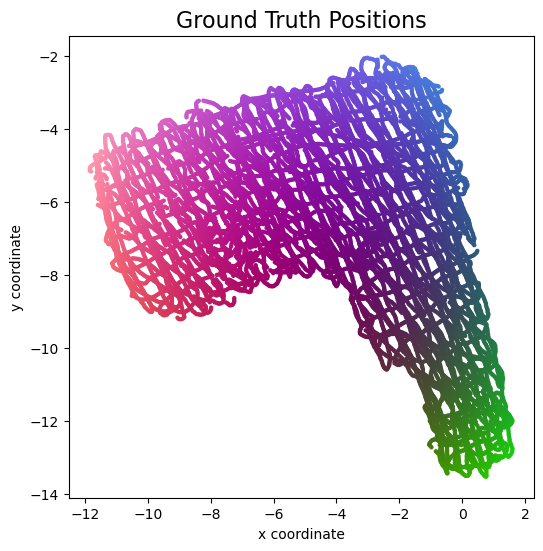

In [4]:
Evaluation.plot_colorized(groundtruth_positions, groundtruth_positions, title="Ground Truth Positions")

### Angle Delay Profile Dissimilarity

In [5]:
def mean_variance_from_delta_adp(delta_adp):
    mean = np.where(delta_adp == 0, 0, np.where(delta_adp > 18, np.inf, delta_adp * 0.0028 + 0.0024))
    variance = np.where(delta_adp == 0, 0, np.where(delta_adp > 18, np.inf, 0.015 * mean))

    return mean, variance

adp_metric = DissimilarityMetrics.ADPDissimilarityMetric(csi_time_domain, mean_variance_from_delta_adp)

### Timestamp/Velocity-Based Dissimilarity

In [6]:
velocity_mean = 0.235
velocity_variance = 0.010

# Make worste-case assumption of perfectly correlated velocities. This maximizes the variance.
velocity_metric = DissimilarityMetrics.VelocityDissimilarityMetric(velocity_mean, velocity_variance, True, timestamps)

### Gaussian Dissimilarity Model and short path computation

This will also take some time

In [7]:
GDM = ChannelChartingCore.GaussianDissimilarityModel([adp_metric, velocity_metric])
GDM.generate_short_paths(total_path_count = 40000, realization_count = 8)

  0%|          | 0/8 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Contracting paths for metric VelocityDissimilarityMetric
68373352 path sections remain to be contracted
31499261 path sections remain to be contracted
10482818 path sections remain to be contracted
1171056 path sections remain to be contracted
9994 path sections remain to be contracted
0 path sections remain to be contracted
Determining longest short path...


Computing longest paths:   0%|          | 0/40000 [00:00<?, ?it/s]

Preparing tasks:   0%|          | 0/40000 [00:00<?, ?it/s]

Starting processes:   0%|          | 0/16 [00:00<?, ?it/s]

Longest short path has 386 hops


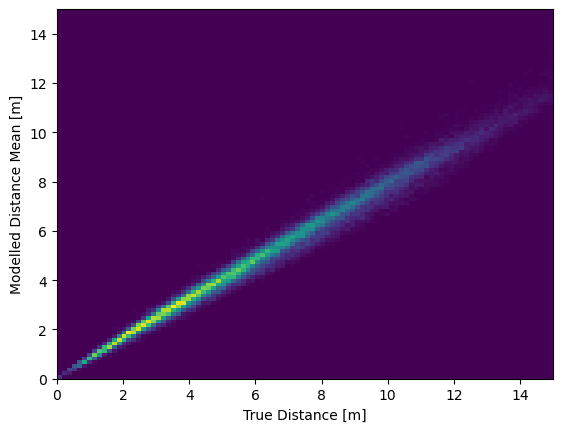

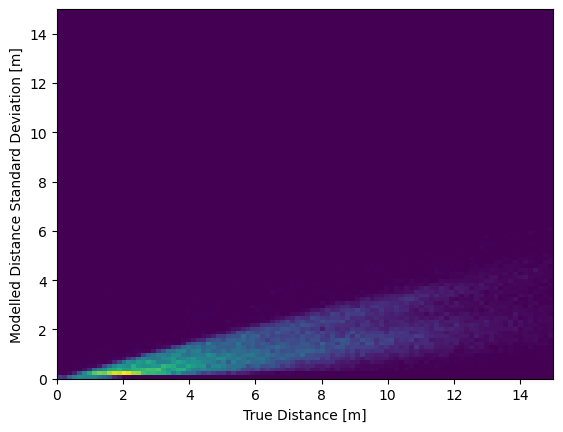

In [8]:
paths, path_hops, paths_d_mean, paths_d_variance = GDM.get_random_short_paths(50000, None)
groundtruth_distance_matrix = np.sqrt(np.sum((groundtruth_positions[:,np.newaxis,:] - groundtruth_positions[np.newaxis,:,:])**2, axis = -1))
groundtruth_dist = np.sum(groundtruth_distance_matrix[paths[:,:-1], paths[:,1:]], axis = 1).flatten()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Mean [m]")
plt.hist2d(groundtruth_dist, paths_d_mean, bins = 100, range = [(0, 15), (0, 15)])
plt.show()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Standard Deviation [m]")
plt.hist2d(groundtruth_dist, np.sqrt(paths_d_variance), bins = 100, range = [(0, 15), (0, 15)])
plt.show()

### Channel Chart Training

Feel free to tweak the hyperparameters!

In [9]:
MIN_BATCH_SIZE = 500
MAX_BATCH_SIZE = 4000
LEARNING_RATE_INITIAL = 1.5e-2
LEARNING_RATE_FINAL = 1e-2
MAX_HOPLENGTH = 20.0
MIN_HOPLENGTH = 0.1
TRAINING_BATCHES = 3000
ACCELERATION_MEAN = 0.0
ACCELERATION_VARIANCE = 0.5
ACCELERATION_WEIGHT = 1e-4

Pre-computing training paths:   0%|          | 0/3005 [00:00<?, ?it/s]

Preparing multiprocessing inputs:   0%|          | 0/3005 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/16 [00:00<?, ?it/s]

I0000 00:00:1733218590.548796  496646 service.cc:145] XLA service 0x72d03829afa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733218590.548850  496646 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-12-03 09:36:30.647196: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-03 09:36:30.970981: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-12-03 09:36:31.896610: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:742] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

   5/3000 ━━━━━━━━━━━━━━━━━━━━ 1:39 33ms/step - loss: 23.8543 - metric: 0.0000e+00

I0000 00:00:1733218593.411539  496646 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 199/3000 ━━━━━━━━━━━━━━━━━━━━ 1:59 43ms/step - loss: 6.9286 - metric: 0.0000e+00

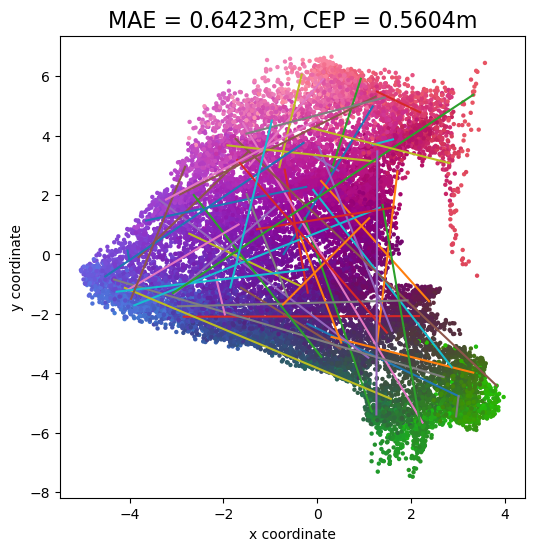

 398/3000 ━━━━━━━━━━━━━━━━━━━━ 1:52 43ms/step - loss: 4.9832 - metric: 0.0000e+00

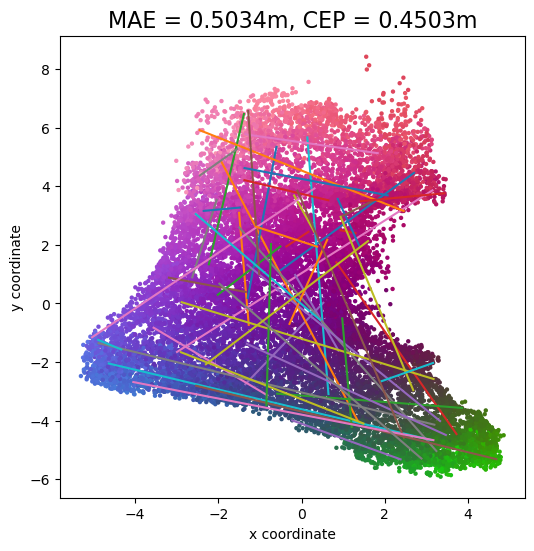

 598/3000 ━━━━━━━━━━━━━━━━━━━━ 1:44 43ms/step - loss: 4.0575 - metric: 0.0000e+00

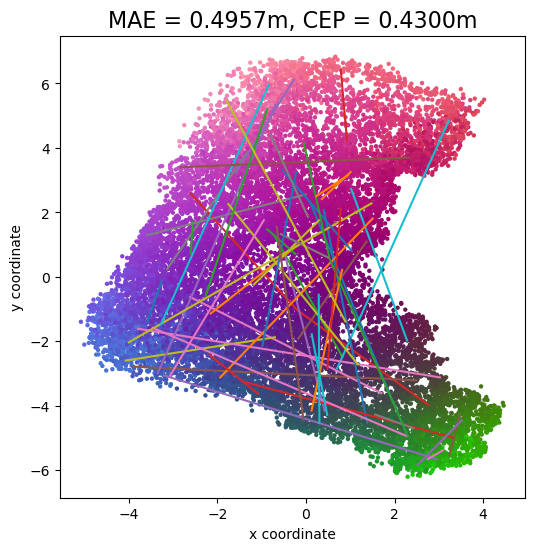

 799/3000 ━━━━━━━━━━━━━━━━━━━━ 1:36 44ms/step - loss: 3.4983 - metric: 0.0000e+00

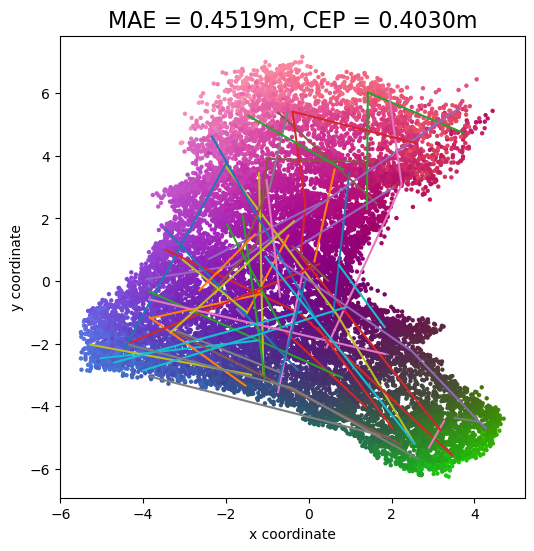

 999/3000 ━━━━━━━━━━━━━━━━━━━━ 1:27 44ms/step - loss: 3.1142 - metric: 0.0000e+00

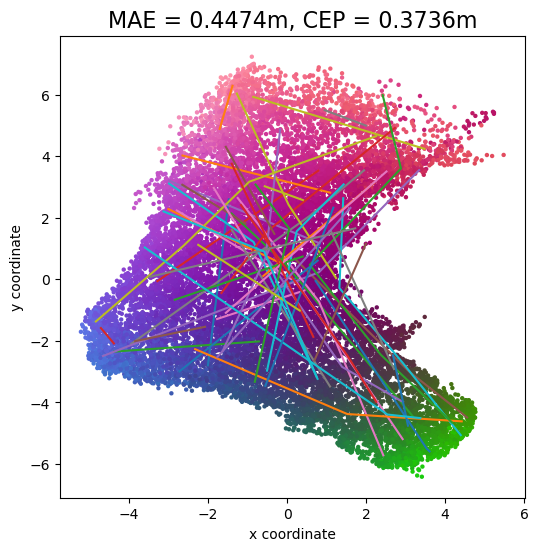

1198/3000 ━━━━━━━━━━━━━━━━━━━━ 1:18 44ms/step - loss: 2.8322 - metric: 0.0000e+00

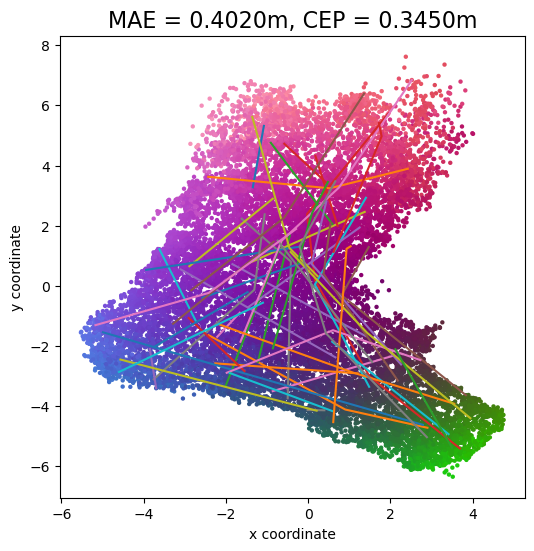

1398/3000 ━━━━━━━━━━━━━━━━━━━━ 1:12 45ms/step - loss: 2.6117 - metric: 0.0000e+00

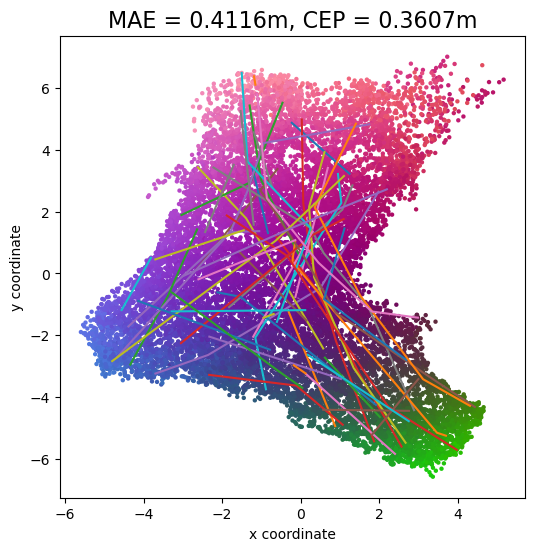

1599/3000 ━━━━━━━━━━━━━━━━━━━━ 1:03 45ms/step - loss: 2.4330 - metric: 0.0000e+00

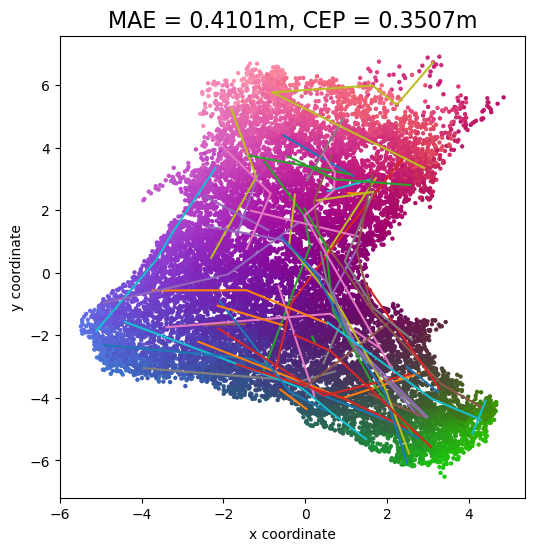

1799/3000 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - loss: 2.2858 - metric: 0.0000e+00

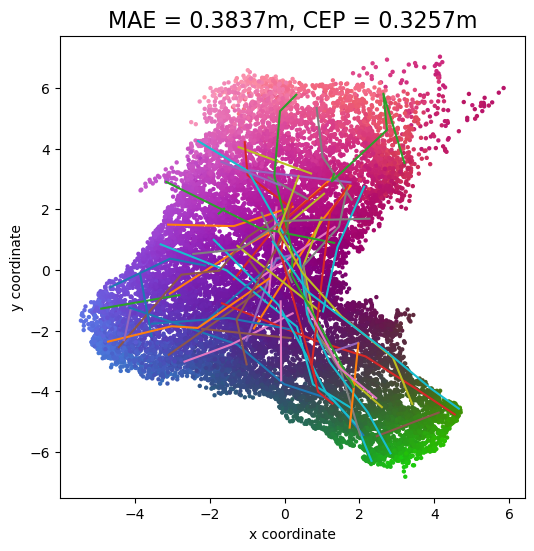

1998/3000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - loss: 2.1620 - metric: 0.0000e+00

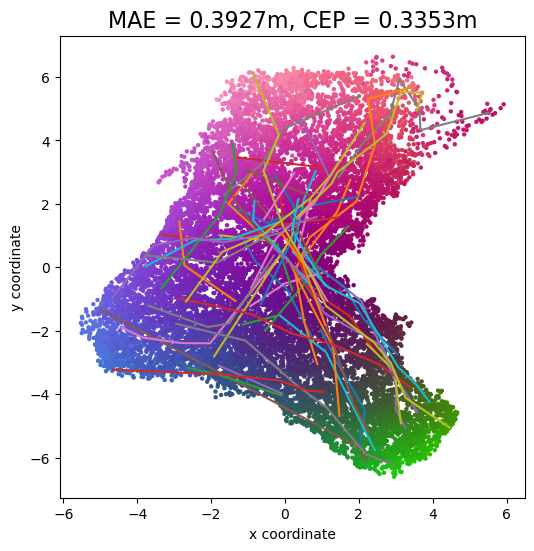

2198/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - loss: 2.0552 - metric: 0.0000e+00

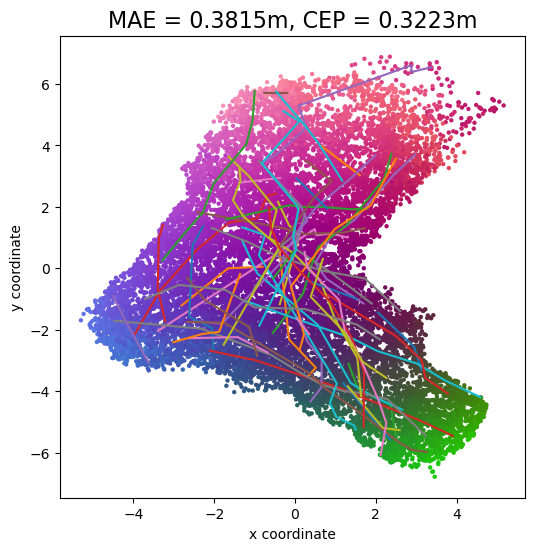

2399/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - loss: 1.9619 - metric: 0.0000e+00

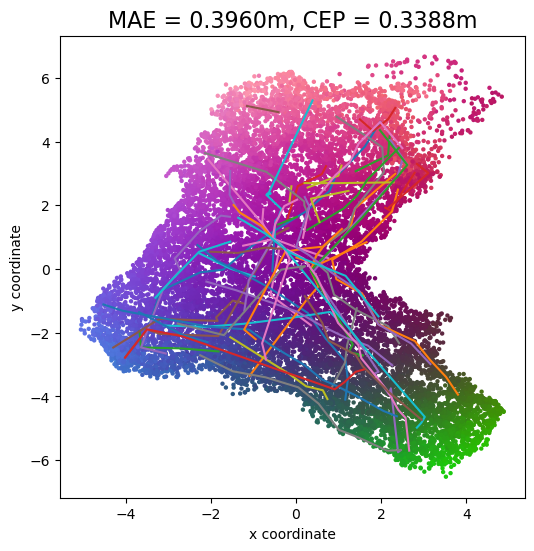

2599/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 1.8799 - metric: 0.0000e+00

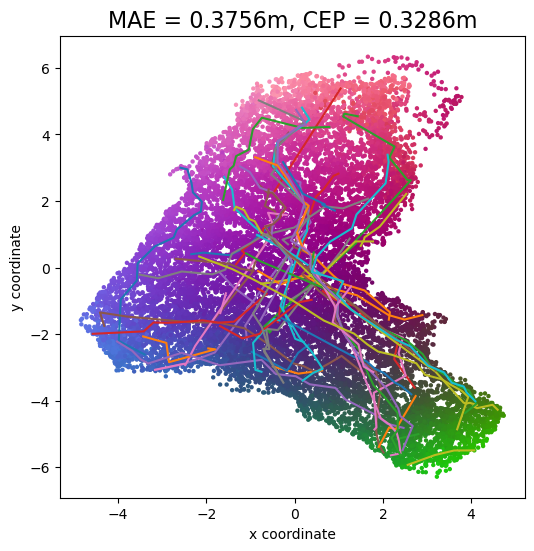

2798/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 1.8069 - metric: 0.0000e+00

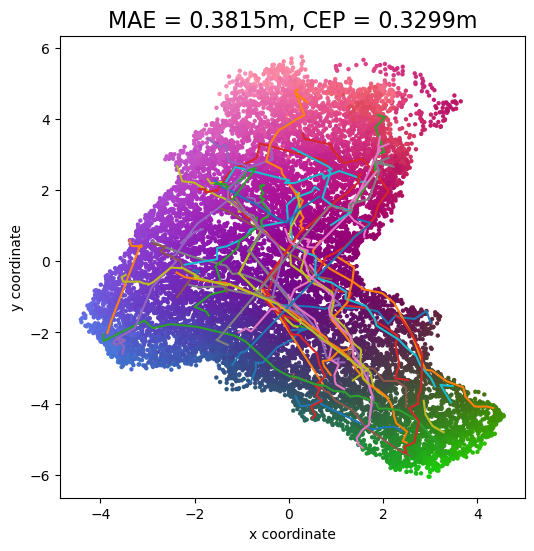

2998/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.7404 - metric: 0.0000e+00

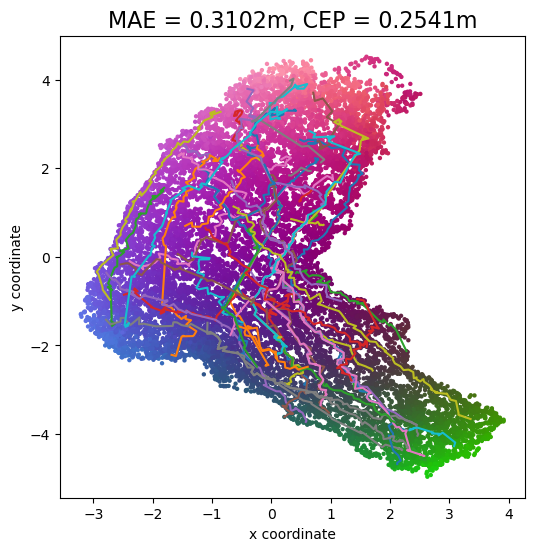

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 142s 46ms/step - loss: 1.7394 - metric: 0.0000e+00


In [10]:
plot_callback = Evaluation.PlotChartCallback(groundtruth_positions, csi_time_domain.shape[0])
cc = ChannelChartingCore.ChannelChart(GDM, csi_time_domain, timestamps, min_batch_size = MIN_BATCH_SIZE, max_batch_size = MAX_BATCH_SIZE, learning_rate_initial = LEARNING_RATE_INITIAL, learning_rate_final = LEARNING_RATE_FINAL, max_hoplength = MAX_HOPLENGTH, min_hoplength = MIN_HOPLENGTH, randomize_pathhops = False, training_batches = TRAINING_BATCHES, plot_callback = plot_callback, acceleration_mean = ACCELERATION_MEAN, acceleration_variance = ACCELERATION_VARIANCE, acceleration_weight = ACCELERATION_WEIGHT)

### Evaluation on Training Set

This is a valid evaluation metric for a self-supervised training technique like Channel Charting.

In [11]:
channel_chart_positions = cc.predict(csi_time_domain)

652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [12]:
ct, tw, ks = Evaluation.ct_tw_ks_on_subset(groundtruth_positions, channel_chart_positions)
print(f"CT: {ct:.4f}\nTW: {tw:.4f}\nKS: {ks:.4f}")

CT: 0.9978
TW: 0.9981
KS: 0.0619


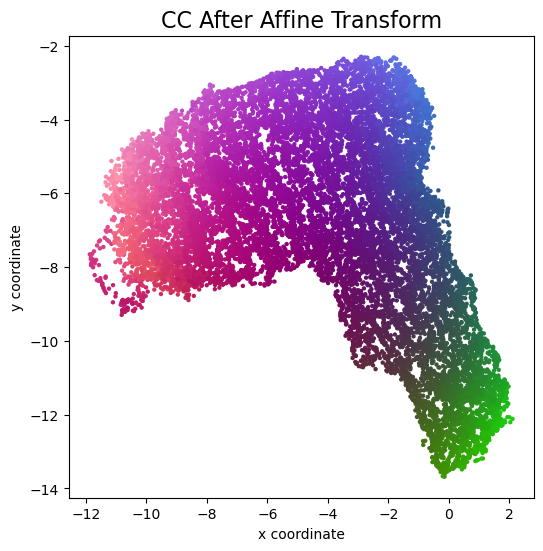

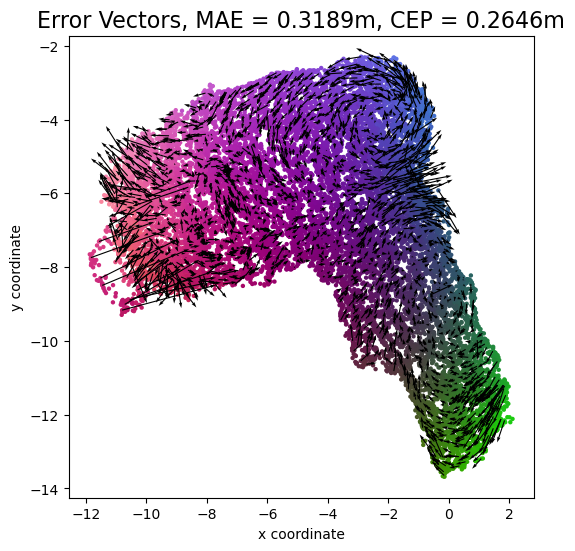

In [13]:
channel_chart_positions_transformed, errorvectors, errors, mae, cep = Evaluation.mean_absolute_error_transformed(groundtruth_positions, channel_chart_positions)
Evaluation.plot_colorized(channel_chart_positions_transformed, groundtruth_positions, title = "CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(channel_chart_positions_transformed, groundtruth_positions, title = f"Error Vectors, MAE = {mae:.4f}m, CEP = {cep:.4f}m", show = False)
plt.quiver(channel_chart_positions_transformed[::nth_errorvector, 0], channel_chart_positions_transformed[::nth_errorvector, 1], errorvectors[::nth_errorvector, 0], errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()

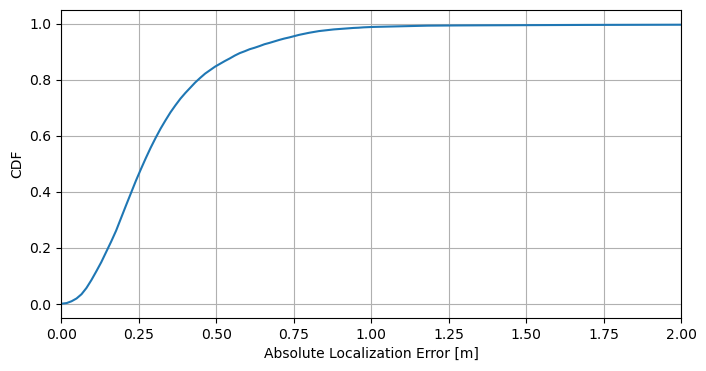

In [14]:
count, bins_count = np.histogram(errors, bins=200)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

bins_count[0] = 0
cdf = np.append([0], cdf)

plt.figure(figsize=(8, 4))
plt.plot(bins_count, cdf)
plt.xlim((0, 2))
plt.xlabel("Absolute Localization Error [m]")
plt.ylabel("CDF")
plt.grid()
plt.show()

### Evaluate on Test Set
The performance on the test set is very similar to the performance we observe for the training set, as one would hope.

In [15]:
test_set_groundtruth_positions = []
test_set_csi_time_domain = []

for csi, pos, time in dichasus_cf0x.testset.batch(1000):
    test_set_csi_time_domain.append(csi.numpy())
    test_set_groundtruth_positions.append(pos.numpy())

test_set_csi_time_domain = np.concatenate(test_set_csi_time_domain)
test_set_groundtruth_positions = np.concatenate(test_set_groundtruth_positions)

2024-12-03 09:39:19.066292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
test_set_channel_chart_positions = cc.predict(test_set_csi_time_domain)

652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [17]:
ts_ct, ts_tw, ts_ks = Evaluation.ct_tw_ks_on_subset(test_set_groundtruth_positions, test_set_channel_chart_positions)
print(f"CT: {ts_ct:.4f}\nTW: {ts_tw:.4f}\nKS: {ts_ks:.4f}")

CT: 0.9978
TW: 0.9981
KS: 0.0655


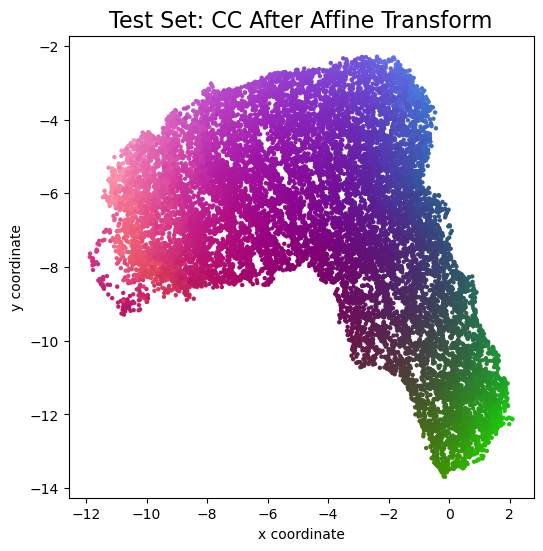

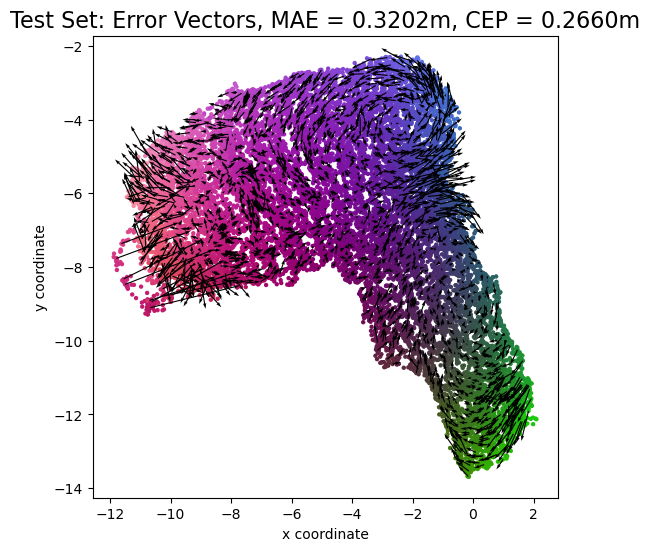

In [18]:
test_set_channel_chart_positions_transformed, ts_errorvectors, ts_errors, ts_mae, ts_cep = Evaluation.mean_absolute_error_transformed(test_set_groundtruth_positions, test_set_channel_chart_positions)
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = "Test Set: CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = f"Test Set: Error Vectors, MAE = {ts_mae:.4f}m, CEP = {ts_cep:.4f}m", show = False)
plt.quiver(test_set_channel_chart_positions_transformed[::nth_errorvector, 0], test_set_channel_chart_positions_transformed[::nth_errorvector, 1], ts_errorvectors[::nth_errorvector, 0], ts_errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()